In [2]:
import re

import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

# Ensure necessary resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')


with open("Lab2_Parsing.txt","r", encoding="cp1252") as f:
    text = f.read()


def extract_error_code(text):
    http_error_match = re.search(r"<HttpError (\d+)", text)
    if http_error_match:
        return f"HTTP Error Code: {http_error_match.group(1)}"

    charmap_range_match = re.search(r"'charmap' codec can't encode characters.*?(\d+)-(\d+)", text)
    if charmap_range_match:
        return f"Charmap Error Positions: {charmap_range_match.group(1)}-{charmap_range_match.group(2)}"
    
    charmap_unicode_match = re.search(r"'charmap' codec can't encode character '(.+)' in position (\d+)", text)
    if charmap_unicode_match:
        return f"Charmap Error Character: {charmap_unicode_match.group(1)}, Position: {charmap_unicode_match.group(2)}"
    
    
    return "No error code found"



In [8]:
pattern = re.compile(r"NewMovieDrPQRd\s*(.*?)\s*NewMovieDrPQRd", re.DOTALL)

matches = pattern.findall(text)

errored = []
sucess = []
for j, match in enumerate(matches, 1):
    chunk = match.strip()
    chunk_split = chunk.split("\n")
    if chunk_split[0] == chunk_split[1]:
        data = {}
        data["ID"] = chunk_split[0]
        data["error"] = extract_error_code(chunk_split[-1])
        
        errored.append(data)
    else:
        sucess.append(chunk)


Text(0.5, 1.0, 'Sucess and faliure count for movie feedback')

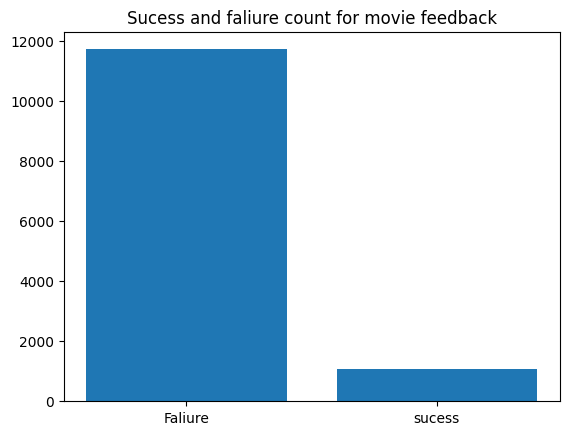

In [22]:
import matplotlib.pyplot as plt 

plt.bar(x=["Faliure","sucess"],height=[len(errored),len(sucess)])
plt.title("Sucess and faliure count for movie feedback")

In [23]:


def process_text(text):
    words = nltk.word_tokenize(text.lower())

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

    bigrams = list(ngrams(filtered_words, 2))
    trigrams = list(ngrams(filtered_words, 3))

    bigram_freq = Counter(bigrams)
    trigram_freq = Counter(trigrams)

    return stop_words, bigram_freq, trigram_freq

def plot_ngram_frequencies(ngram_freq, title):
    common_ngrams = ngram_freq.most_common(10)

    ngrams, counts = zip(*common_ngrams)

    ngram_labels = [' '.join(ngram) for ngram in ngrams]

    plt.figure(figsize=(10, 5))
    plt.barh(ngram_labels, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    plt.title(title)
    plt.gca().invert_yaxis()  
    plt.show()


text = "\n".join(sucess)
stop_words, bigram_freq, trigram_freq = process_text(text)

In [24]:
print("Stop words used in filtering:", stop_words)
print("\nMost common bigrams:", bigram_freq.most_common(10))
print("\nMost common trigrams:", trigram_freq.most_common(10))

Stop words used in filtering: {'until', 'now', 'his', "aren't", 'all', 'while', 'you', 't', 'an', 'over', 'won', "don't", "didn't", 'he', 'this', "shouldn't", 'am', 'shan', "haven't", 'by', 'll', 'before', 's', 'couldn', 'against', 'because', 'after', 'her', 'y', 'most', 'has', 'my', 'myself', 'we', "you're", 'they', 'o', 're', "should've", 'during', 'themselves', 'have', 'each', "you've", 'than', 'here', 'wouldn', 'be', 'does', 'if', 'ma', 'himself', "mightn't", 'theirs', 'but', 'is', 'no', 'having', 'herself', 'out', 'did', 'been', 'yourself', 'will', "wasn't", 'why', 'a', 'weren', 'with', 'about', 'them', 'again', 'very', 'him', 'between', 'doesn', 'in', "shan't", 'our', 'such', 'who', 'mustn', 'ours', 'their', "you'd", 'down', 'hadn', 'further', 'ain', 'haven', "that'll", 'as', 'me', 'wasn', 'above', 'didn', "couldn't", 'your', "doesn't", "she's", 'aren', 'into', 'too', 'only', 'some', 'from', 'that', 'not', 'it', 'was', 'there', 'how', "weren't", 'she', 'which', 'were', 'on', 'are

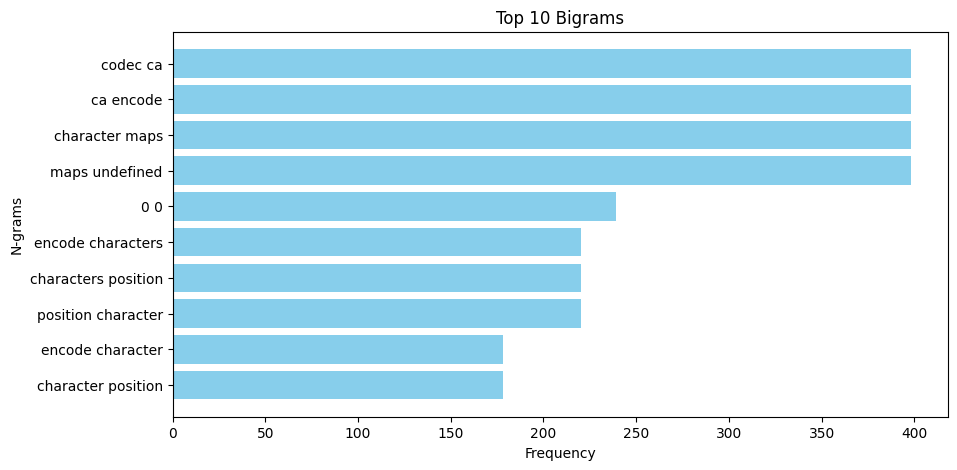

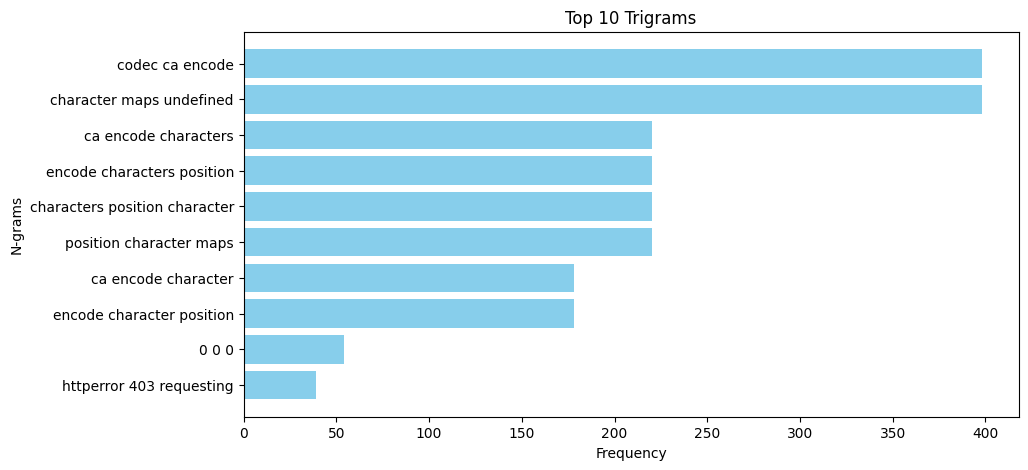

In [25]:
plot_ngram_frequencies(bigram_freq, "Top 10 Bigrams")
plot_ngram_frequencies(trigram_freq, "Top 10 Trigrams")